In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import probplot

In [ ]:
import pandas as pd
df=pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [ ]:
# Handle missing values
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


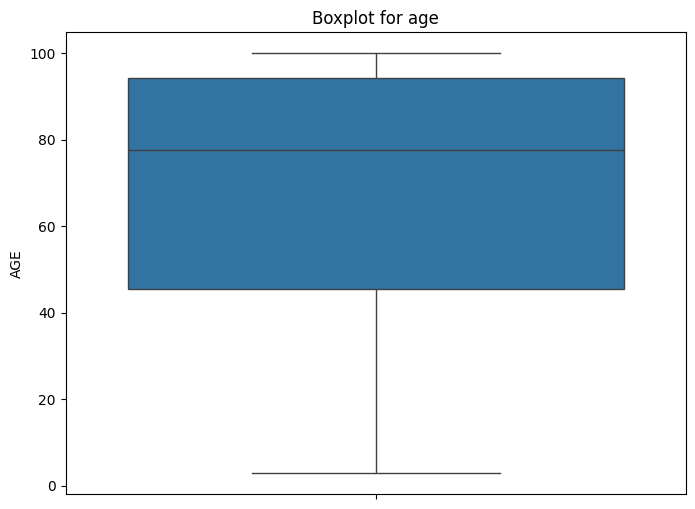

In [ ]:
# Identify and handle outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['AGE'])
plt.title('Boxplot for age')
plt.show()

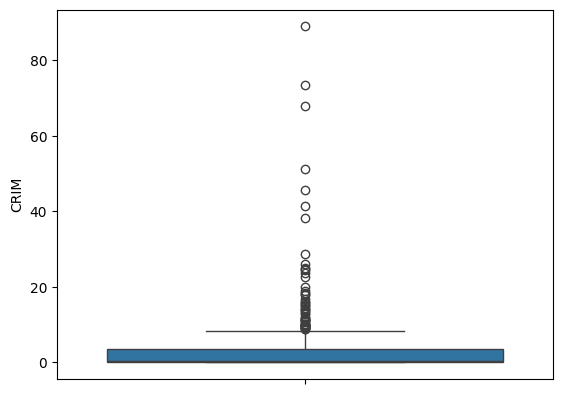

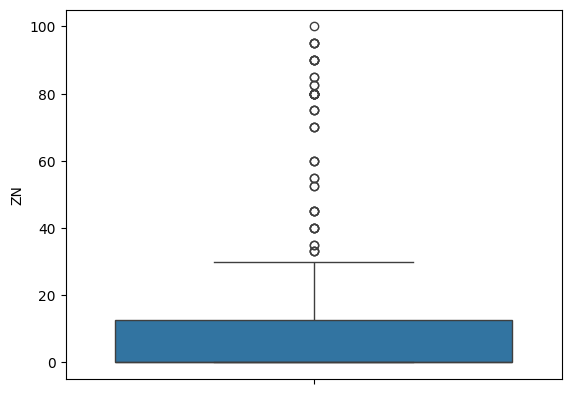

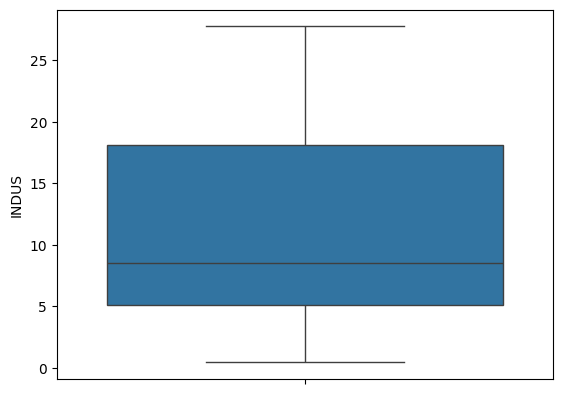

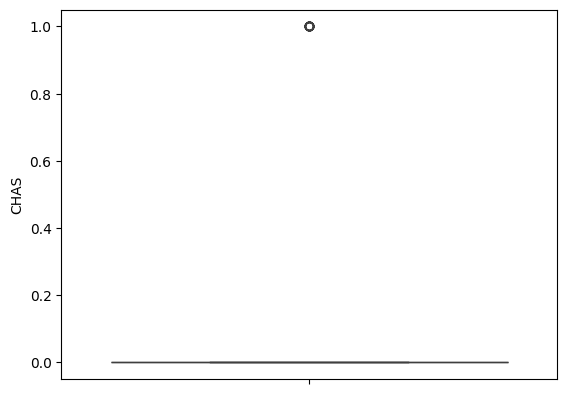

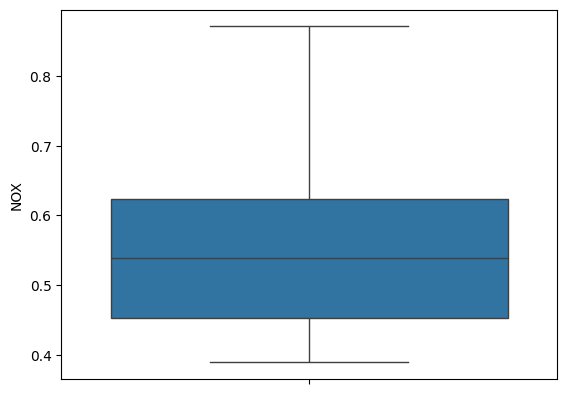

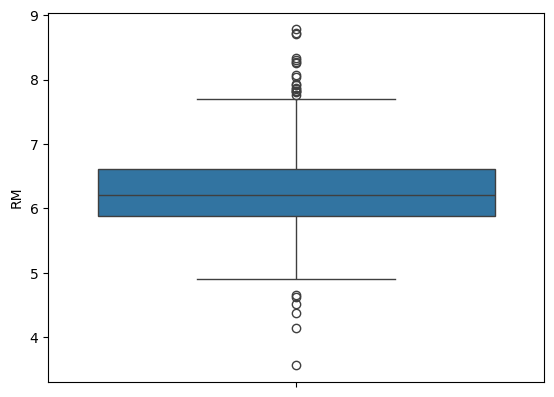

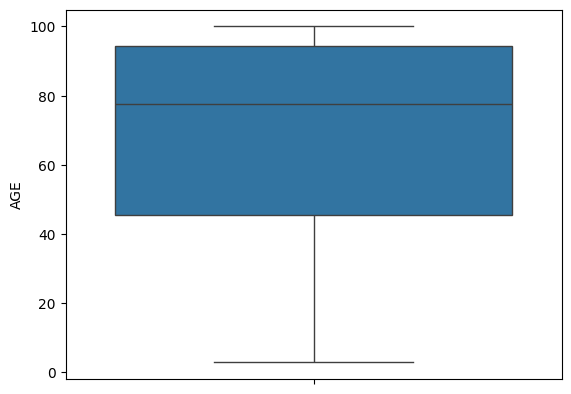

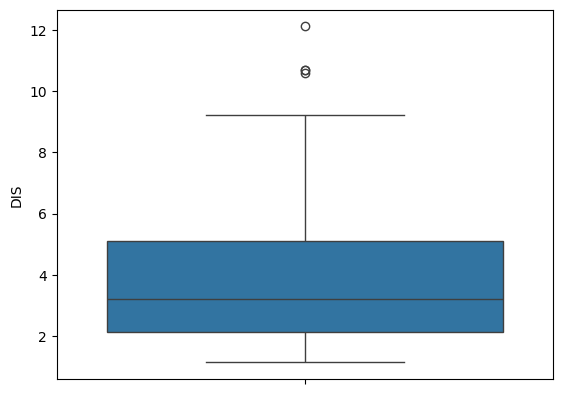

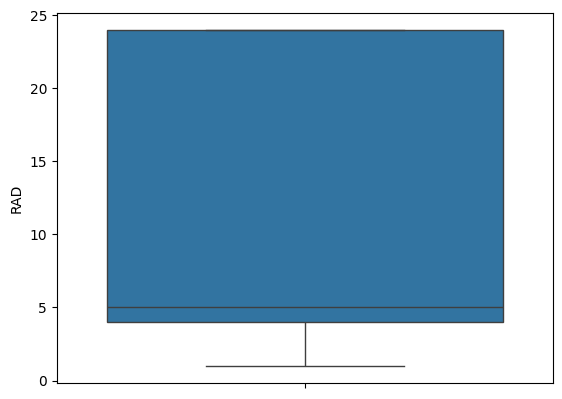

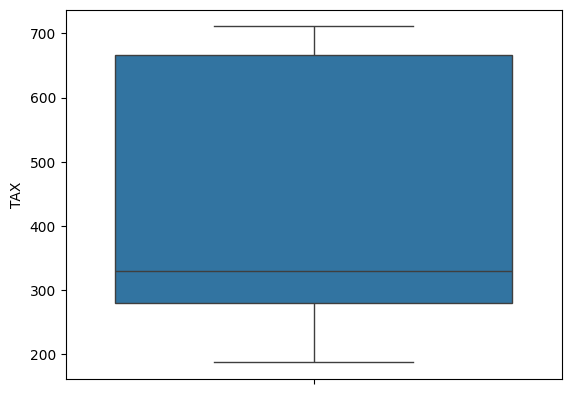

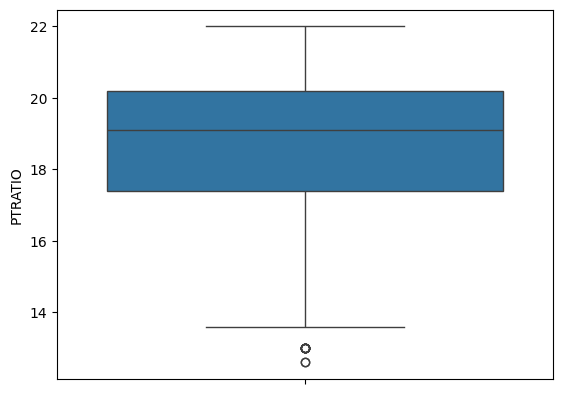

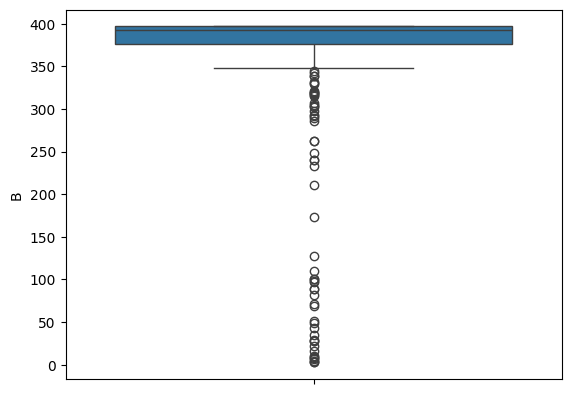

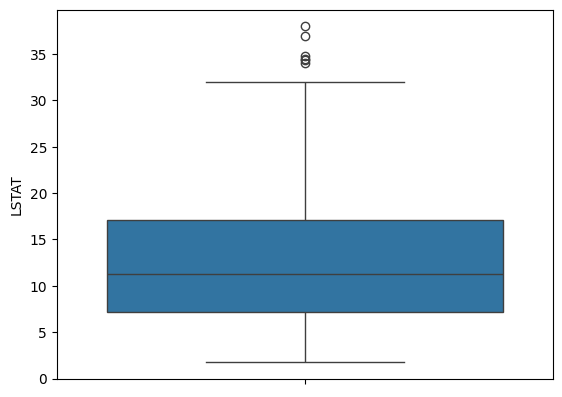

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for i in ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'] :
    sns.boxplot(df[i])
    plt.show()

In [ ]:
import numpy as np
for col in ['ZN','CHAS','RM','DIS','PTRATIO','B','LSTAT']:
  q1, q3 = np.percentile(df[col], [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

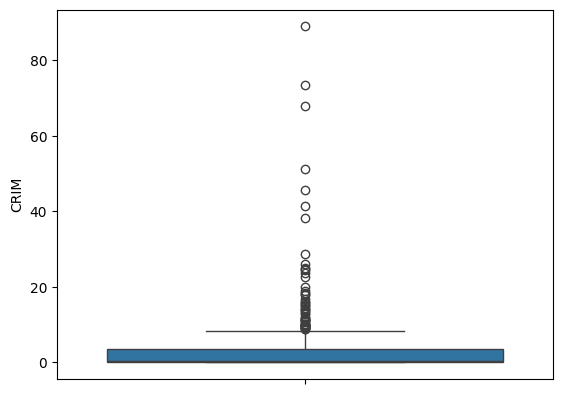

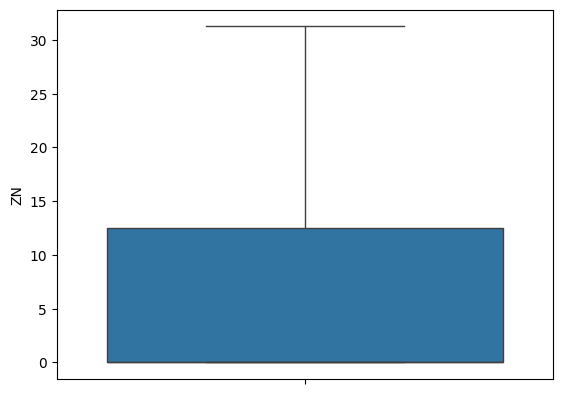

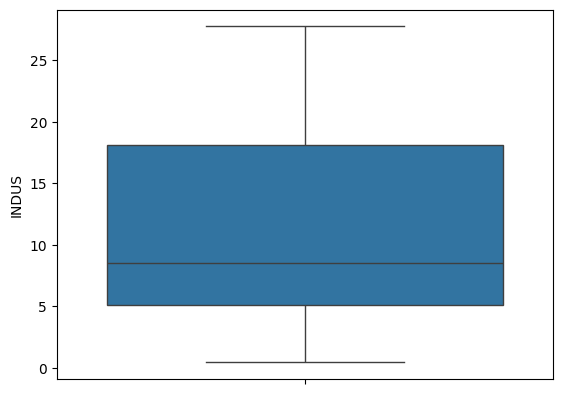

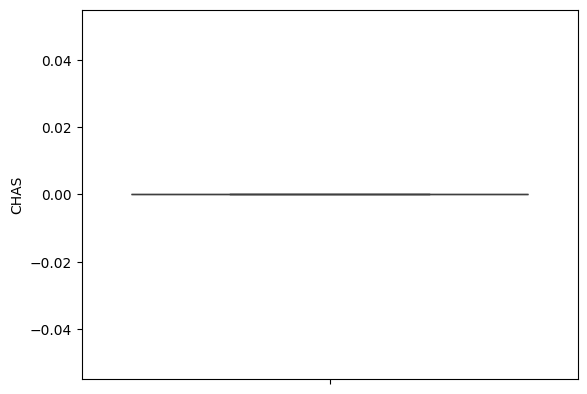

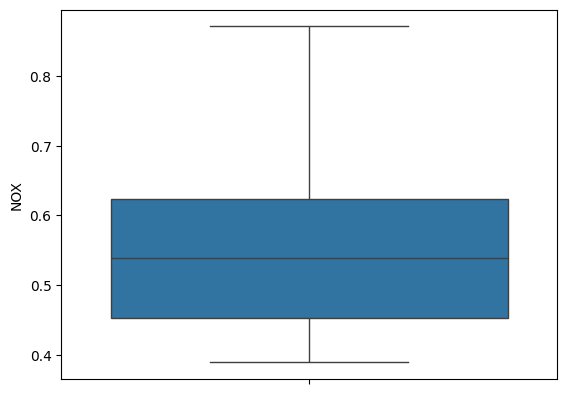

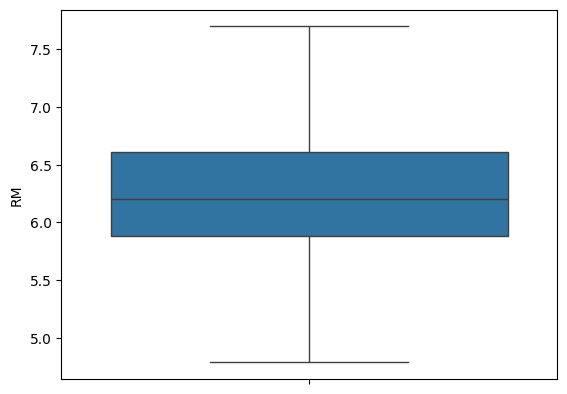

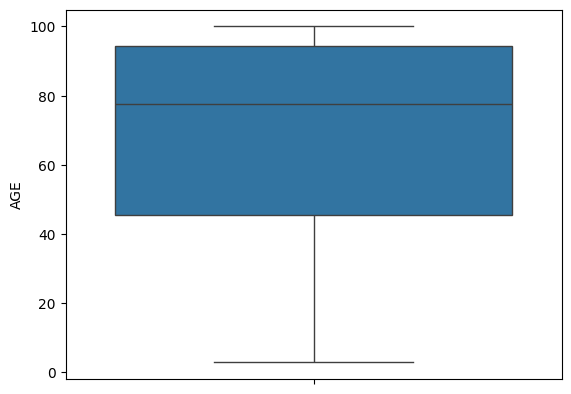

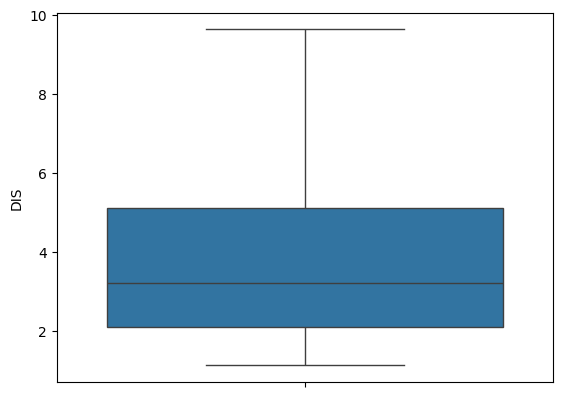

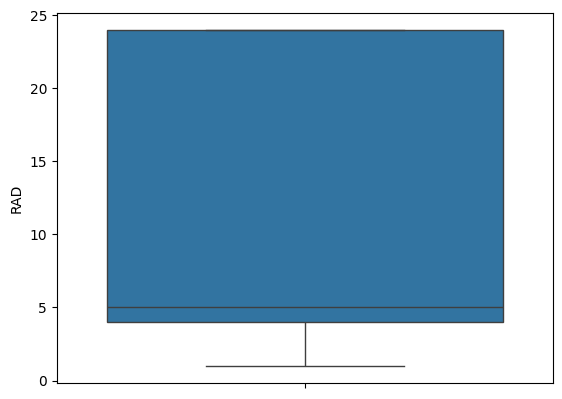

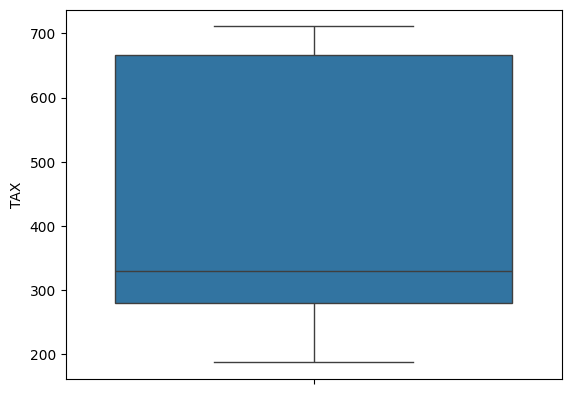

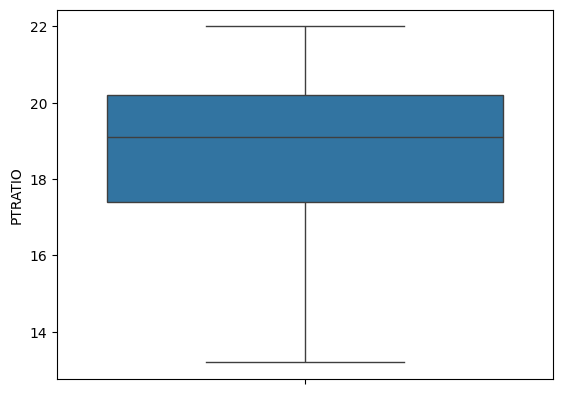

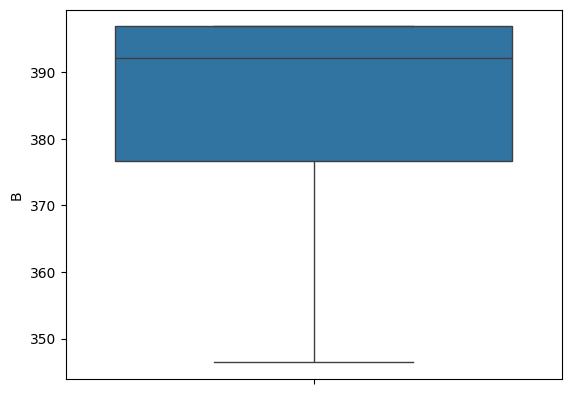

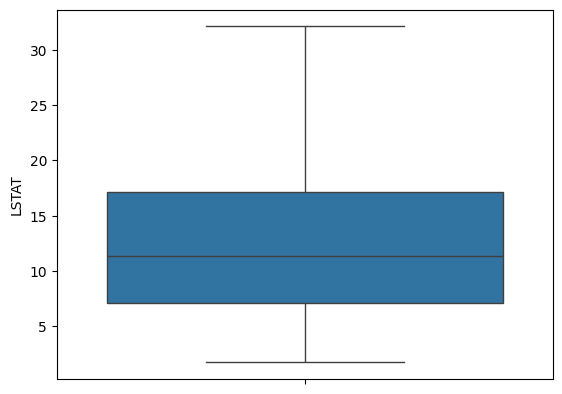

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for i in ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'] :
    sns.boxplot(df[i])
    plt.show()

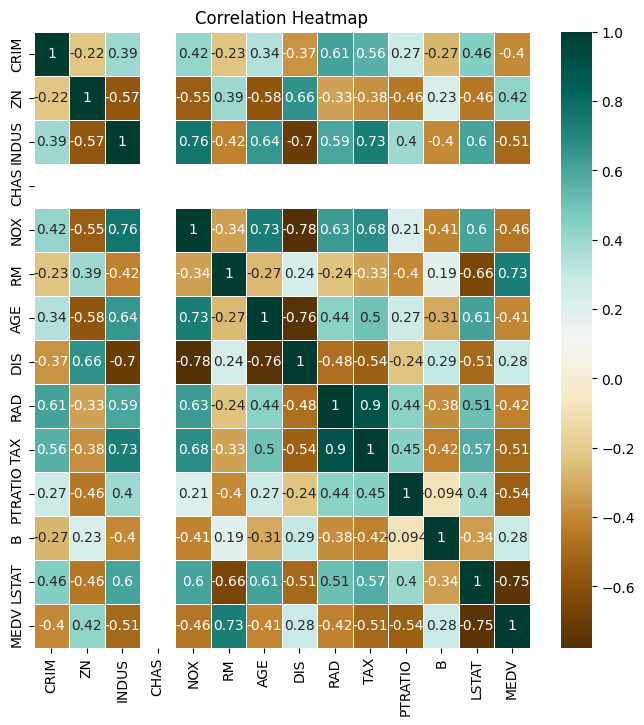

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='BrBG',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

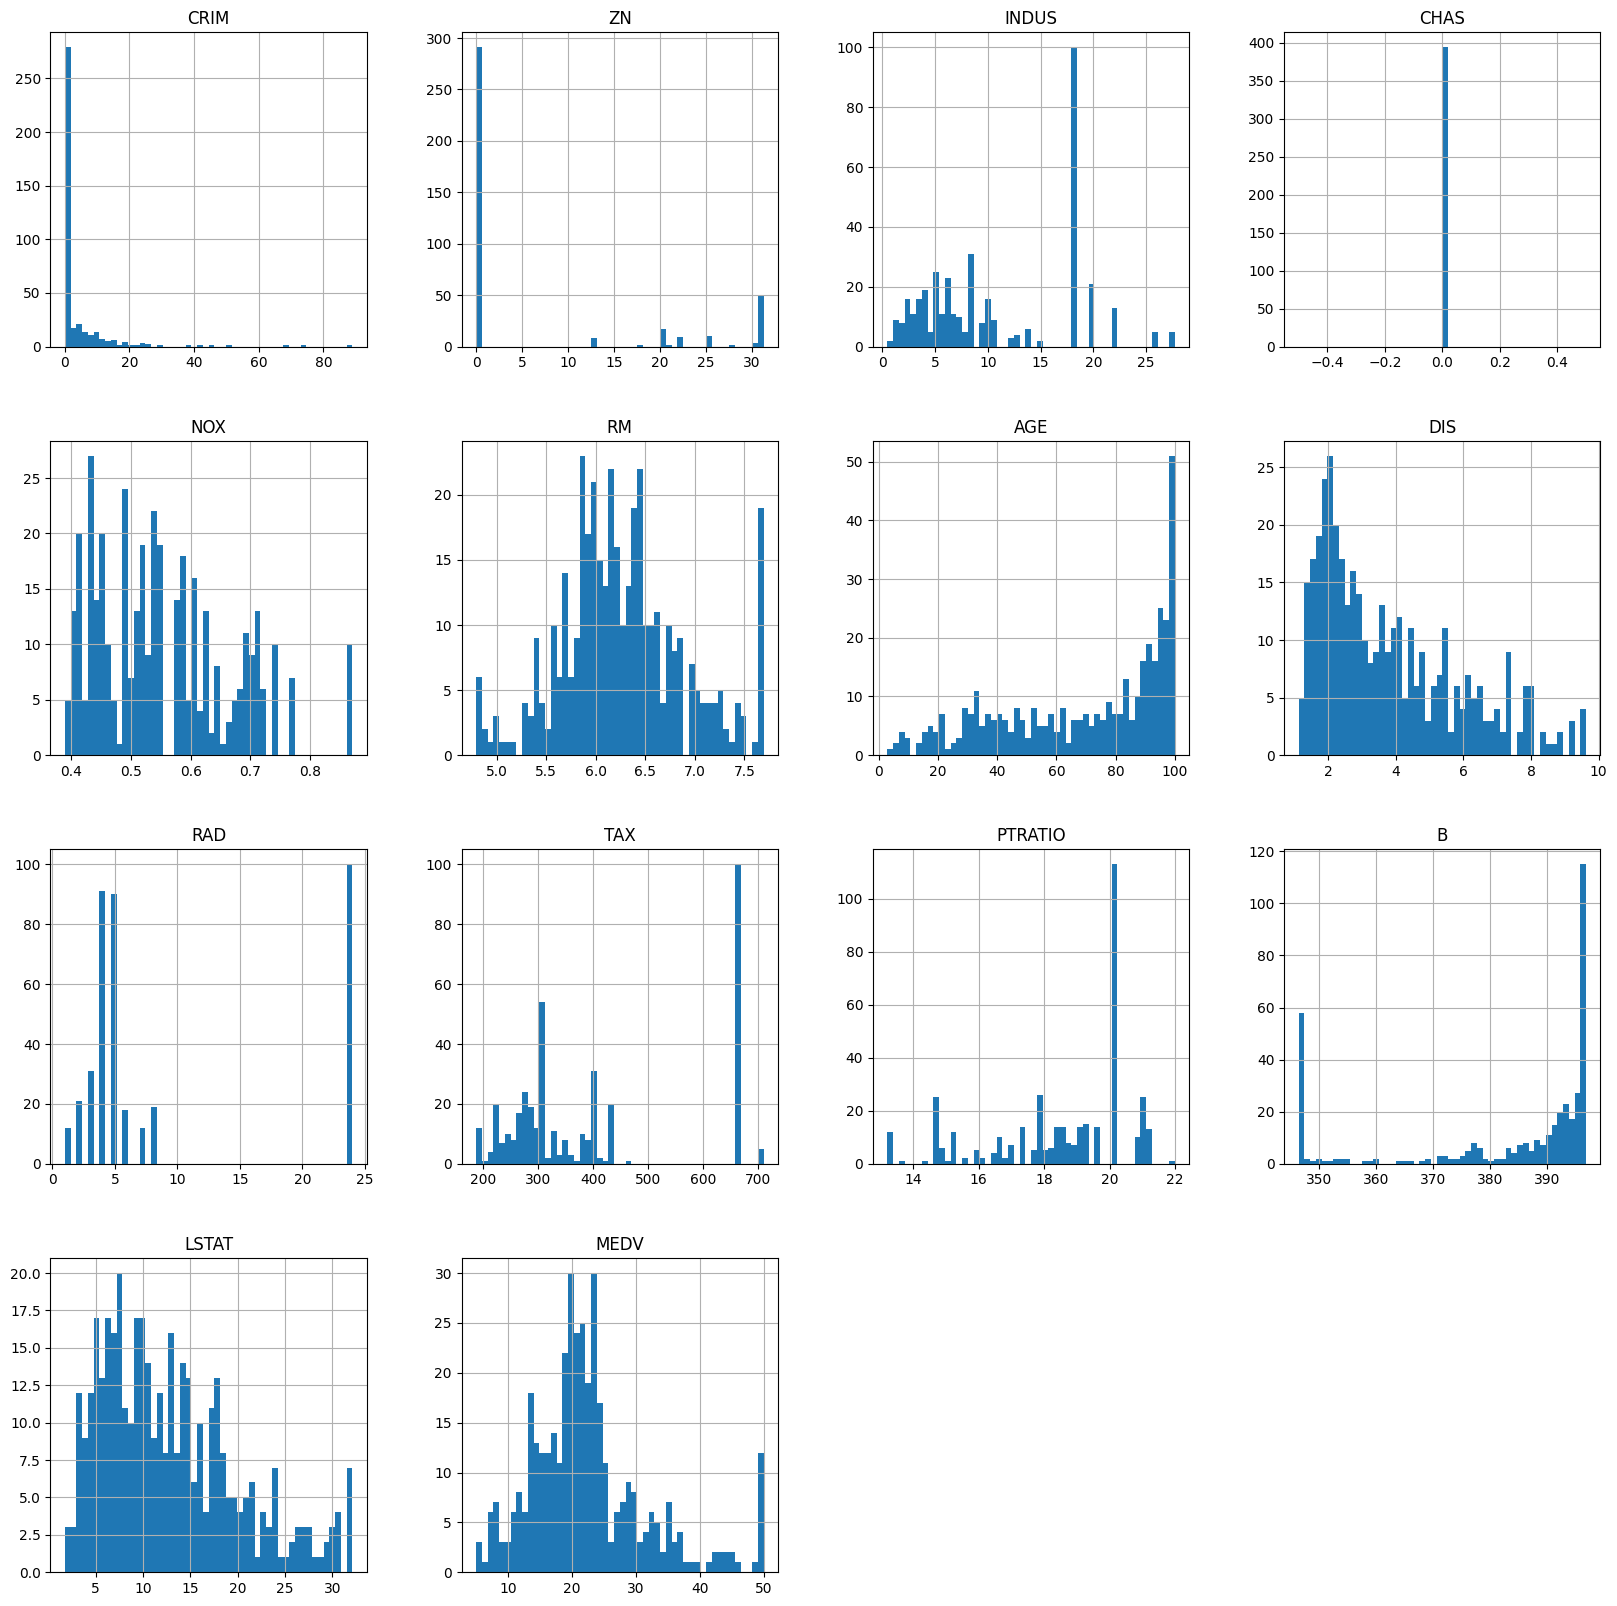

In [ ]:
df.hist(bins=50,figsize=(20,20))

In [ ]:
skewness = df.skew()
print("Skewness for each feature:\n", skewness)

Skewness for each feature:
 CRIM       5.256934
ZN         1.291711
INDUS      0.358792
CHAS       0.000000
NOX        0.703377
RM         0.318113
AGE       -0.594880
DIS        0.900682
RAD        1.050144
TAX        0.692876
PTRATIO   -0.846316
B         -1.190329
LSTAT      0.834066
MEDV       1.065946
dtype: float64


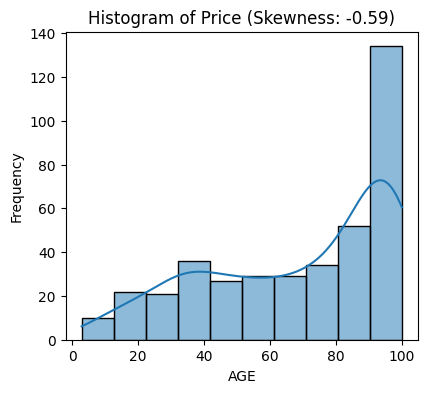

In [ ]:
skewness_price = df['AGE'].skew()
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['AGE'], kde=True)
plt.title(f'Histogram of Price (Skewness: {skewness_price:.2f})')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

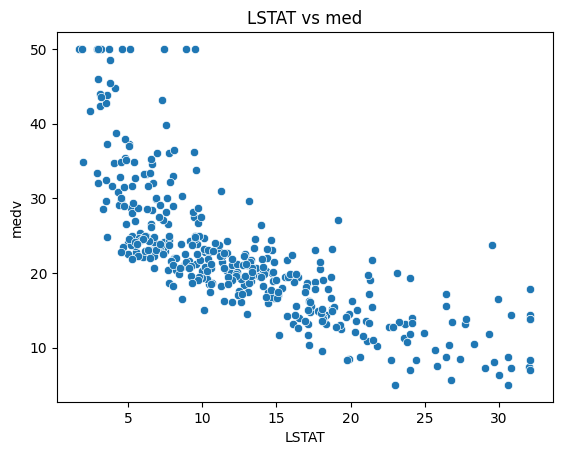

In [ ]:
sns.scatterplot(x=df['LSTAT'], y=df['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('medv')
plt.title('LSTAT vs med')
plt.show()

**NEGATIVE CORRELTION EXIST BETWEEN LSTAT AND MEDV**

In [ ]:
#Reducing the size
df['MEDV'] = np.log(df['MEDV'])
df['B'] = np.log(df['B'])
df['CRIM'] = np.log(df['CRIM'])
df['ZN'] = df['ZN'] + 1
df['ZN'] = np.log(df['ZN'])


In [ ]:
skewness = df.skew()
print("Skewness for each feature:\n", skewness)

Skewness for each feature:
 CRIM       0.398236
ZN         1.117671
INDUS      0.358792
CHAS       0.000000
NOX        0.703377
RM         0.318113
AGE       -0.594880
DIS        0.900682
RAD        1.050144
TAX        0.692876
PTRATIO   -0.846316
B         -1.219214
LSTAT      0.834066
MEDV      -0.411841
dtype: float64


#**MODEL BUILDING**

In [ ]:
from sklearn.utils import shuffle
df= shuffle(df, random_state=100)
X = df.drop(columns=['MEDV'])
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
num_vars = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_with_const = sm.add_constant(X_train)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]
print(vif_data)


    Feature        VIF
0     const  89.083714
1      CRIM   7.172597
2        ZN   2.620709
3     INDUS   4.175093
4      CHAS        NaN
5       NOX   4.513475
6        RM   2.159341
7       AGE   3.343785
8       DIS   4.146246
9       RAD   8.639800
10      TAX   7.696340
11  PTRATIO   1.981048
12        B   1.389590
13    LSTAT   3.056040


In [ ]:
from sklearn.preprocessing import MinMaxScaler
num_vars = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [ ]:
X_train = X_train.dropna()
y_train = y_train.dropna()
print(X_train.shape)
print(y_train.shape)
X_train, y_train = X_train.align(y_train, join='inner', axis=0)

(315, 13)
(315,)


In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print("Regression Model Summary:")
print(model.summary())

Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     79.50
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           6.30e-86
Time:                        06:10:26   Log-Likelihood:                 57.192
No. Observations:                 315   AIC:                            -88.38
Df Residuals:                     302   BIC:                            -39.60
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7123     

In [ ]:
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Evaluation Metrics:
Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18
R-squared: 0.82


In [ ]:
# Residual analysis
residuals = y_train - model.predict(X_train_sm)

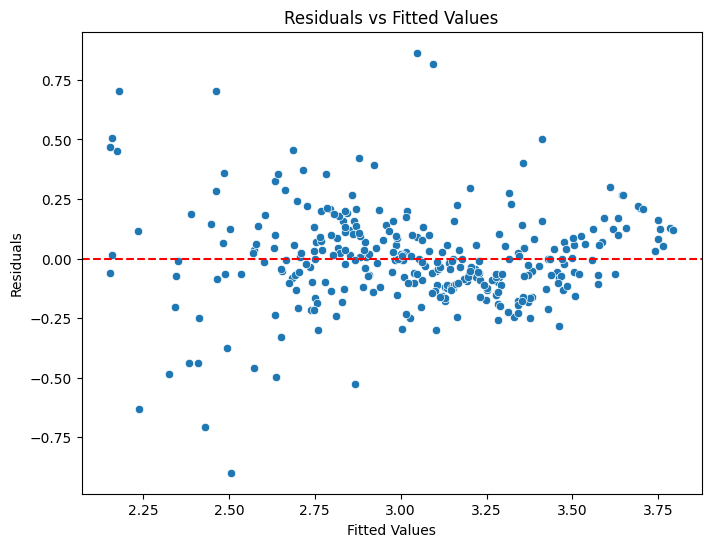

In [ ]:
# Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.predict(X_train_sm), y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = df.drop(columns=['MEDV'])
y = df['MEDV']




**K-FOLD VALIDATION**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import sklearn.metrics

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

cv_rmse = np.sqrt(-cv_scores)
print("Cross-Validation RMSE Scores:", cv_rmse,"\n")
print("Mean RMSE:", np.mean(cv_rmse))
#Calculation of R square value
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_train, y_pred)
print("R square value:",r2)

Cross-Validation RMSE Scores: [0.1810342  0.23288941 0.18242936 0.24291139 0.20423454] 

Mean RMSE: 0.20869977875217477
R square value: 0.7595546787855556


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
# Train model
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test Set RMSE:", rmse)
# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R square value:",r2)

Test Set RMSE: 0.18103419686841443
R square value: 0.8156274215755932


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize the model
model = LinearRegression()

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_kf = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE for K-Fold
cv_rmse_kf = np.sqrt(-cv_scores_kf)

# Calculate R² for K-Fold
cv_r2_kf = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Stratified K-Fold Cross-Validation
# For StratifiedKFold, we'll bin the target variable
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_bins = pd.cut(y, bins=5, labels=False)  # Bin the target variable for stratification

cv_scores_skf = cross_val_score(model, X, y_bins, cv=skf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE for Stratified K-Fold
cv_rmse_skf = np.sqrt(-cv_scores_skf)

# Calculate R² for Stratified K-Fold
cv_r2_skf = cross_val_score(model, X, y_bins, cv=skf, scoring='r2')

# Print results
print("K-Fold Cross-Validation RMSE Scores:", cv_rmse_kf)
print("Mean RMSE (K-Fold):", np.mean(cv_rmse_kf))
print("K-Fold Cross-Validation R² Scores:", cv_r2_kf)
print("Mean R² (K-Fold):", np.mean(cv_r2_kf))

print("\nStratified K-Fold Cross-Validation RMSE Scores:", cv_rmse_skf)
print("Mean RMSE (Stratified K-Fold):", np.mean(cv_rmse_skf))
print("Stratified K-Fold Cross-Validation R² Scores:", cv_r2_skf)
print("Mean R² (Stratified K-Fold):", np.mean(cv_r2_skf))





K-Fold Cross-Validation RMSE Scores: [0.1810342  0.23288941 0.18242936 0.24291139 0.20423454]
Mean RMSE (K-Fold): 0.20869977875217477
K-Fold Cross-Validation R² Scores: [0.81562742 0.65303876 0.71970137 0.72691404 0.75130004]
Mean R² (K-Fold): 0.7333163260905579

Stratified K-Fold Cross-Validation RMSE Scores: [0.54683246 0.55942986 0.51577991 0.44575104 0.46463973]
Mean RMSE (Stratified K-Fold): 0.506486602132181
Stratified K-Fold Cross-Validation R² Scores: [0.63776792 0.62088618 0.67773943 0.75608788 0.73040327]
Mean R² (Stratified K-Fold): 0.6845769371683629


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize the model
model = LinearRegression()

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_kf = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE for K-Fold
cv_rmse_kf = np.sqrt(-cv_scores_kf)

# Calculate R² for K-Fold
cv_r2_kf = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Stratified K-Fold Cross-Validation
# For StratifiedKFold, we'll bin the target variable
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
y_bins = pd.cut(y, bins=7, labels=False)  # Bin the target variable for stratification

cv_scores_skf = cross_val_score(model, X, y_bins, cv=skf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE for Stratified K-Fold
cv_rmse_skf = np.sqrt(-cv_scores_skf)

# Calculate R² for Stratified K-Fold
cv_r2_skf = cross_val_score(model, X, y_bins, cv=skf, scoring='r2')

# Print results
print("K-Fold Cross-Validation RMSE Scores:", cv_rmse_kf)
print("Mean RMSE (K-Fold):", np.mean(cv_rmse_kf))
print("K-Fold Cross-Validation R² Scores:", cv_r2_kf)
print("Mean R² (K-Fold):", np.mean(cv_r2_kf))

print("\nStratified K-Fold Cross-Validation RMSE Scores:", cv_rmse_skf)
print("Mean RMSE (Stratified K-Fold):", np.mean(cv_rmse_skf))
print("Stratified K-Fold Cross-Validation R² Scores:", cv_r2_skf)
print("Mean R² (Stratified K-Fold):", np.mean(cv_r2_skf))




K-Fold Cross-Validation RMSE Scores: [0.1810342  0.23288941 0.18242936 0.24291139 0.20423454]
Mean RMSE (K-Fold): 0.20869977875217477
K-Fold Cross-Validation R² Scores: [0.81562742 0.65303876 0.71970137 0.72691404 0.75130004]
Mean R² (K-Fold): 0.7333163260905579

Stratified K-Fold Cross-Validation RMSE Scores: [0.66273705 0.68172399 0.60410359 0.63661742 0.60991273 0.72277156
 0.67949442]
Mean RMSE (Stratified K-Fold): 0.6567658245565487
Stratified K-Fold Cross-Validation R² Scores: [0.72451215 0.71040182 0.73409492 0.71706065 0.74030014 0.67287492
 0.69008328]
Mean R² (Stratified K-Fold): 0.7127611252290327


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize the model
model = LinearRegression()

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_kf = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE for K-Fold
cv_rmse_kf = np.sqrt(-cv_scores_kf)

# Calculate R² for K-Fold
cv_r2_kf = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Stratified K-Fold Cross-Validation
# For StratifiedKFold, we'll bin the target variable
skf = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
y_bins = pd.cut(y, bins=9, labels=False)  # Bin the target variable for stratification

cv_scores_skf = cross_val_score(model, X, y_bins, cv=skf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE for Stratified K-Fold
cv_rmse_skf = np.sqrt(-cv_scores_skf)

# Calculate R² for Stratified K-Fold
cv_r2_skf = cross_val_score(model, X, y_bins, cv=skf, scoring='r2')

# Print results
print("K-Fold Cross-Validation RMSE Scores:", cv_rmse_kf)
print("Mean RMSE (K-Fold):", np.mean(cv_rmse_kf))
print("\nStratified K-Fold Cross-Validation RMSE Scores:", cv_rmse_skf)
print("Mean RMSE (Stratified K-Fold):", np.mean(cv_rmse_skf))




K-Fold Cross-Validation RMSE Scores: [0.1810342  0.23288941 0.18242936 0.24291139 0.20423454]
Mean RMSE (K-Fold): 0.20869977875217477

Stratified K-Fold Cross-Validation RMSE Scores: [0.76138348 0.64561034 0.64140252 1.061995   0.92581942 0.88681396
 0.8800133  0.48774755 0.71108588]
Mean RMSE (Stratified K-Fold): 0.7779857174291369


**IN K-FOLD AND STTRATIFIED K-FOLD **